In [5]:
import pandas as pd
import numpy as np
df=pd.read_csv("sales_data_2.csv")
print(df)

          Date Firm bought from  Buying price  Quantity bought   Customer  \
0   2023-08-21          Vendor6         72.11               60  Customer7   
1   2023-08-21          Vendor4         75.08               92  Customer7   
2   2023-08-21          Vendor7         83.93               16  Customer2   
3   2023-08-21          Vendor7         52.01               62  Customer3   
4   2023-08-21          Vendor2         98.91                1  Customer5   
..         ...              ...           ...              ...        ...   
65  2023-08-27          Vendor4         64.82               28  Customer6   
66  2023-08-27          Vendor8         88.79               14  Customer3   
67  2023-08-27          Vendor5         63.30               81  Customer5   
68  2023-08-27          Vendor5         94.06               18  Customer5   
69  2023-08-27          Vendor5         56.28               25  Customer6   

    Selling price  Quantity sold  
0           91.58             44  
1    

In [6]:
array1=df["Buying price"]
array2=df["Selling price"]
units=df["Quantity sold"]
array1=array1*units
array2=array2*units

In [7]:
# quesion 1
df['gross_margin']=array2-array1
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)
daily_gross_profit = df.resample('D')['gross_margin'].sum()
df["rolling_3_day_average"] = daily_gross_profit.rolling('3D').mean()
print(df["rolling_3_day_average"])

Date
2023-08-21    6847.340000
2023-08-21    6847.340000
2023-08-21    6847.340000
2023-08-21    6847.340000
2023-08-21    6847.340000
                 ...     
2023-08-27    4023.853333
2023-08-27    4023.853333
2023-08-27    4023.853333
2023-08-27    4023.853333
2023-08-27    4023.853333
Name: rolling_3_day_average, Length: 70, dtype: float64


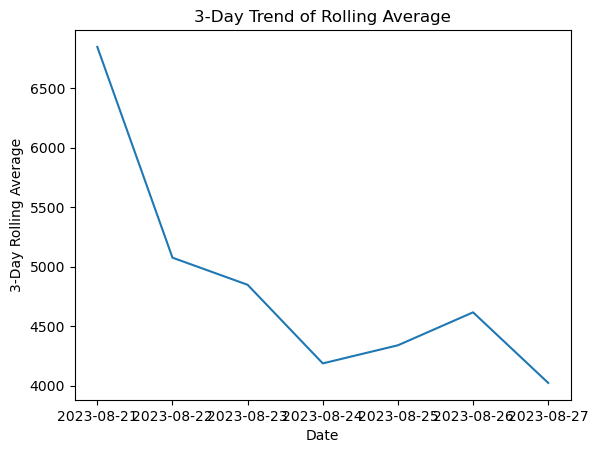

In [10]:
#question 2
import matplotlib.pyplot as plt
plt.plot(df['rolling_3_day_average'])
plt.xlabel('Date')
plt.ylabel('3-Day Rolling Average')
plt.title('3-Day Trend of Rolling Average')
plt.show()


In [11]:
df['Diff'] = df['rolling_3_day_average'].diff()

trend = None
if all(df['Diff'] > 0):
    trend = "Increasing"
elif all(df['Diff'] < 0):
    trend = "Decreasing"
else:
    trend = "Mixed"

print(f"The trend is {trend}.")


The trend is Mixed.


In [12]:
# question 3
vendor_gross_margin = df.groupby('Firm bought from')['gross_margin'].sum()

customer_gross_margin = df.groupby('Customer')['gross_margin'].sum()
vendor_count=0
customer_count=0
for vendor, margin in vendor_gross_margin.items():
    if margin < 1000:  
        vendor_count+=1
for customer, margin in customer_gross_margin.items():
    if margin < 1000:  
        customer_count+=1
if customer_count<vendor_count:
    print("Fire the vendor")
else:
    print("Let go the customer")

Fire the vendor


In [13]:
#question 4
buying_price_percentiles = df['Buying price'].quantile([0.25, 0.5, 0.75])
selling_price_percentiles = df['Selling price'].quantile([0.25, 0.5, 0.75])

print("Percentiles for Buying Price:")
print(buying_price_percentiles)

print("Percentiles for Selling Price:")
print(selling_price_percentiles)

Percentiles for Buying Price:
0.25    29.90
0.50    60.76
0.75    78.32
Name: Buying price, dtype: float64
Percentiles for Selling Price:
0.25     38.9750
0.50     78.9900
0.75    103.3975
Name: Selling price, dtype: float64


In [14]:
#question 5
buying_price_25th_percentile = df['Buying price'].quantile(0.25)
selling_price_75th_percentile = df['Selling price'].quantile(0.75)

below_25th_percentile_buying = df[df['Buying price'] < buying_price_25th_percentile]
above_75th_percentile_selling = df[df['Selling price'] > selling_price_75th_percentile]

print(f"{len(below_25th_percentile_buying)} Sapota transactions have buying prices below the 25th percentile.")
print(f"{len(above_75th_percentile_selling)} Sapota transactions have selling prices above the 75th percentile.")


18 Sapota transactions have buying prices below the 25th percentile.
18 Sapota transactions have selling prices above the 75th percentile.


In [15]:
#quesion 6
gross_sum=df['gross_margin'].sum()

vendor_4_data = df[df['Firm bought from'] == 'Vendor4']

total_revenue_vendor_4 = (vendor_4_data['Selling price'] * vendor_4_data['Quantity sold']).sum()

total_cost_vendor_4 = (vendor_4_data['Buying price'] * vendor_4_data['Quantity sold']).sum()

gross_margin_vendor_4 = total_revenue_vendor_4 - total_cost_vendor_4

impact_on_gross_margin = (gross_margin_vendor_4 / gross_sum) * 100

print("Total revenue from Vendor 4:",total_revenue_vendor_4)
print("Total cost of products from Vendor 4:",total_cost_vendor_4)
print("Gross margin from Vendor 4:",gross_margin_vendor_4)
print("Overall gross margin for the dataset:",gross_sum)
print("Percentage impact on gross margin if Vendor 4 is honored:",impact_on_gross_margin)


if (impact_on_gross_margin>20):
    print("since vendor4 impacted more than 20 percentage he must be honoured")



Total revenue from Vendor 4: 27255.22
Total cost of products from Vendor 4: 20351.91
Gross margin from Vendor 4: 6903.310000000001
Overall gross margin for the dataset: 31482.75
Percentage impact on gross margin if Vendor 4 is honored: 21.92727763616584
since vendor4 impacted more than 20 percentage he must be honoured


In [16]:
#question 7
vendors = df['Firm bought from'].unique()
max_margin_vendor = None
max_theoretical_margin = -float('inf')
vendors = df['Firm bought from'].unique()
max_margin_vendor = None
max_theoretical_margin = -float('inf')

for vendor in vendors:
    vendor_data = df[df['Firm bought from'] == vendor]
    
    total_revenue = (vendor_data['Selling price'] * vendor_data['Quantity sold']).sum()
    
    total_cost = (vendor_data['Buying price'] * vendor_data['Quantity sold']).sum()
    
    gross_margin_a = total_revenue - total_cost
    
    if gross_margin_a > max_theoretical_margin:
        max_theoretical_margin = gross_margin_a
        max_margin_vendor = vendor

print("The vendor with the highest theoretical maximum margin is : ",max_margin_vendor)
print("Theoretical Maximum Margin:",max_theoretical_margin)

The vendor with the highest theoretical maximum margin is :  Vendor4
Theoretical Maximum Margin: 6903.310000000001


In [17]:
#question 8

branch = 'Vendor4' 
branch_data = df[df['Firm bought from'] == branch]
from sklearn.linear_model import LinearRegression
avg=branch_data["Selling price"].mean()
model = LinearRegression()
X=np.array(branch_data['Selling price']).reshape(-1,1)
Y=np.array(branch_data['Quantity sold'])
model.fit(X,Y)
X_new=np.array([avg,avg+1]).reshape(-1,1)
predict=model.predict(X_new)
elasticity=predict[1]-predict[0]
print(elasticity)


0.434752095018645
